<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIZ ILEANA RODRIGUEZ
20/02/2023 - 02/03/2023

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### __Data set de vinos del mundo__

Esta es una versión reducida de la base de datos [winemag-data](https://gist.github.com/clairehq/79acab35be50eaf1c383948ed3fd1129), que contiene una reseña en inglés sobre una gran cantidad de vinos del mundo.

### __Descripción de los campos__

 - **country**: El país de donde proviene el vino
 - **description** : Algunas frases de un sommelier que describen el sabor, olor, apariencia, sensación, etc. del vino.
 - **designation**: La denominación. El viñedo dentro de la bodega de donde proceden las uvas que elaboraron el vino.
 - **points**: la cantidad de puntos que WineEnthusiast calificó al vino en una escala del 1 al 100 (aunque dicen que solo publican reseñas de vinos con una puntuación> = 80).
 - **price**: El costo de una botella de vino.
 - **province**: La provincia o estado de donde proviene el vino
 - **region_1**: el área de cultivo de vino en una provincia o estado (es decir, Napa)
 - **region_2**: a veces hay regiones más específicas, especificadas dentro de un área de cultivo del vino (es decir, Rutherford dentro del Valle de Napa), pero este valor a veces puede estar en blanco.
 - **taster_name**: nombre de la persona que probó y revisó el vino.
 - **taster_twitter_handle**: identificador de Twitter para la persona que probó y revisó el vino.
 - **title**: el título de la reseña de vinos, que a menudo contiene la cosecha si está interesado en extraer esa característica.
 - **variety**: la variedad: el tipo de uva utilizada para elaborar el vino (es decir, Pinot Noir).
 - **winery**: la bodega que hizo el vino.

### TEST

In [2]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/winemag-data-less.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.2M  100 23.2M    0     0  44.8M      0 --:--:-- --:--:-- --:--:-- 44.7M


In [3]:
# leemos el dataframe usando read_csv
df = pd.read_csv("winemag-data-less.csv")
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59995 entries, 0 to 59994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             59995 non-null  int64  
 1   country                59964 non-null  object 
 2   description            59995 non-null  object 
 3   designation            42728 non-null  object 
 4   points                 59995 non-null  int64  
 5   price                  55750 non-null  float64
 6   province               59964 non-null  object 
 7   region_1               50163 non-null  object 
 8   region_2               23068 non-null  object 
 9   taster_name            47586 non-null  object 
 10  taster_twitter_handle  45381 non-null  object 
 11  title                  59995 non-null  object 
 12  variety                59995 non-null  object 
 13  winery                 59995 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 6.4+

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [4]:
#Borremos la columna Unnamed ya que la base de datos tra su porpio indice y con el indice default del df tendriamos dos indices. 
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


### __Veamos cuantas reseñas de vinos mexicanos tenemos.__

#### &#9758; Construye una nueva Tabla con las reseñas de vinos mexicanos. 
- Quédate **sólo** con las siguientes columnas: `['country','winery','variety','description','points','price']`
- Haz que el índice se reinicie en 0.
- Guarda este DataFrame en la variable vinosMX.

In [5]:
"""
SECUENCIA:
1. Ubicar todos los registros de México usando indexación booleana
2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
3. Reiniciar el índice usando reset_index()
4. Tirar (drop) la nueva columna index 
5. Asignar el resultado de este proceso a la variable vinosMX
"""
# TU CODIGO
# 1. Ubicar todos los registros de México usando indexación booleana
vinosMX = df[df['country']=='Mexico']

# 2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
vinosMX = vinosMX[['country','winery','variety','description','points','price']]

# 3. Reiniciar el índice usando reset_index()
vinosMX = vinosMX.reset_index()

# 4. Tirar (drop) la nueva columna index 
vinosMX = vinosMX.drop('index',axis=1)
vinosMX

,country,winery,variety,description,points,price
0,Mexico,L.A. Cetto,Nebbiolo,"The color is appropriately light, the aromas a...",88,18.0
1,Mexico,Monte Xanic,Sauvignon Blanc,"Sauvignon Blanc is, in general, one of Baja's ...",87,15.0
2,Mexico,L.A. Cetto,Cabernet Sauvignon,"Aromas of mature Cabernet: cassis, tobacco lea...",87,18.0
3,Mexico,Cava Aragon,Nebbiolo,"While this is fiery on the nose, you also get ...",88,27.0
4,Mexico,L.A. Cetto,Petite Sirah,"Dark and earthy, slightly pruny and alcoholic,...",83,8.0
5,Mexico,Hacienda La Lomita,Rosé,Oxidized cherry and strawberry aromas settle o...,83,21.0
6,Mexico,Monte Xanic,Cabernet Franc,"With aromas of salsa, chili peppers and tomato...",86,39.0
7,Mexico,Tres Valles,Sauvignon Blanc,Mild hints of tropical fruit are less than con...,84,15.0
8,Mexico,Unión de Productores del Valle (UPVG),Red Blend,"This odd blend of Barbera, Cabernet Sauvignon,...",83,22.0
9,Mexico,Monte Xanic,Red Blend,This Cabernet blend is one of Baja's best reds...,90,56.0


### __Veamos cuantas reseñas de vinos por país tenemos.__

#### &#9758; Muestra en una gráfica de barras la distribución del número de reseñas por país (_top 10_). 

#### Puedes auxiliarte con alguna de estos métodos de Pandas:
 - [pandas.DataFrame.count](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)
 - [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
 - [pandas.Series.index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html)
 - [pandas.Series.values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.values.html)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


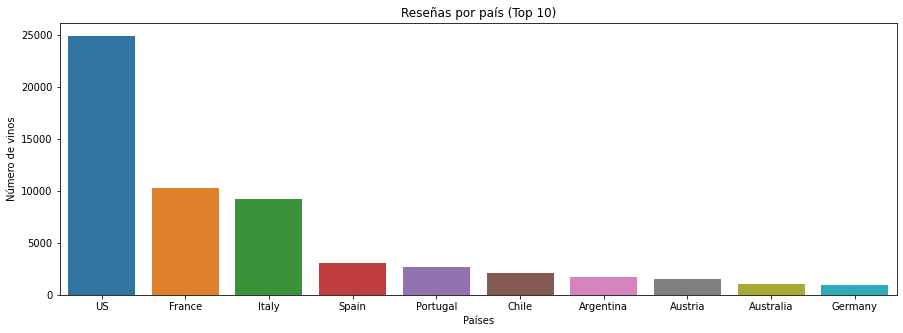

In [6]:
"""
SECUENCIA:
1. Ubicar el nombre de la columna de país
2. Sobre esta columna, obtener la Serie correspondiente
3. Hacer un conteo de los valores únicos sobre esta Serie

4. X en la gráfica de barras son los países (índice de la Serie)
5. Y en la gráfica de barras son los conteos por país (values de la Serie)
6. Usar Seaborn para graficar el diagrama de barras
7. Rotular la gráfica y los ejes
"""
# 1. Ubicar el nombre de la columna de país
# 2. Sobre esta columna, obtener la Serie correspondiente
# 3. Hacer un conteo de los valores únicos sobre esta Serie
conteos=df.country.value_counts()

# 4. X en la gráfica de barras son los países (índice de la Serie)
# 5. Y en la gráfica de barras son los conteos por país (values de la Serie)
x = conteos.index
y = conteos.values

plt.figure(figsize=(15,5))      # los valores son el hancho y alto de la gráfica 
sns.barplot(x[:10], y[:10])     #cambiar los colores de la grafica ... el numero son las agrupaciones

# En una sola línea:
#sns.barplot(df.country.value_counts().index[:10], df.country.value_counts().values[:10])

plt.xlabel("Países")
plt.ylabel("Número de vinos")
plt.title("Reseñas por país (Top 10)")

plt.show()

### __Veamos ahora cuál es el precio promedio por cada país.__

#### &#9758; Muestra en una gráfica de barras el precio promedio por país, en orden descendente (_top 10_). 

Puedes consultar:
 - [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

#### &#9758; ¿Cuál sería el precio promedio por variedad? 

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

In [7]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [8]:
promedio = df[['country','price']]
promedio.head(3)

,country,price
0,Italy,NaN
1,Portugal,15.0
2,US,14.0


In [9]:
promedio=df[['country','price']].groupby("country").mean().reset_index().sort_values(by=['price'], ascending=False)
promedio.head(3)

,country,price
36,Switzerland,97.000000
17,Hungary,52.839286
12,England,51.275862


# ☞ ¿Cuál sería el precio promedio por PAÍS?
🙂 Escribe la secuencia de pasos que tendrías que realizar.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


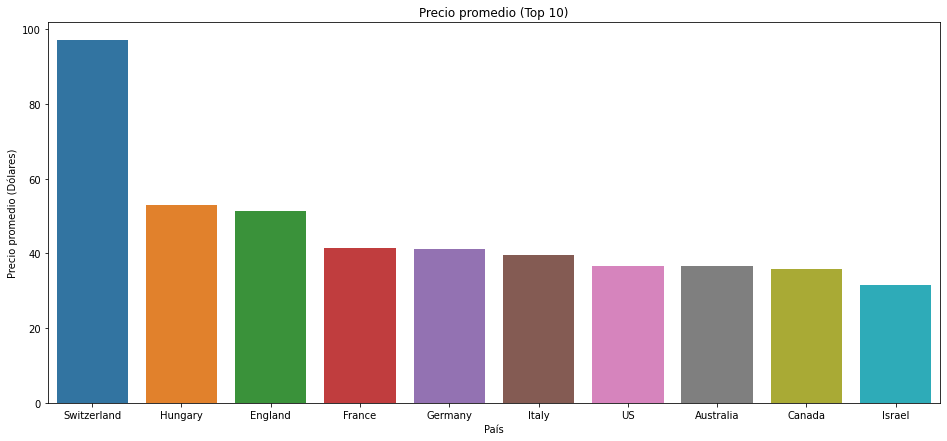

In [10]:
"""
SECUENCIA: precio promedio x país 
1. Seleccionar las variables
2. Agrupar por país ("country")
3. Calcular la media de precios ("price")
4. Resetear el índice 
5. Ordenar precios promedio en orden descendente
6. Definir el valor de X en la gráfica de barras que son los países
7. Definir Y en la gráfica de barras que son precios promedio (values de la Serie)
8. Usar Seaborn para graficar el diagrama de barras
9. Rotular la gráfica y los ejes

"""
promedios = df[['country','price']].groupby("country").mean().reset_index().sort_values(by=['price'], ascending=False)

x=promedios.country
y=promedios.price

plt.figure(figsize=(16,7))
sns.barplot(x[:10], y[:10])

plt.xlabel("País")
plt.ylabel("Precio promedio (Dólares)")
plt.title("Precio promedio (Top 10)")

plt.show()

# ☞ ¿Cuál sería el precio promedio por variedad?
🙂 Escribe la secuencia de pasos que tendrías que realizar.



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


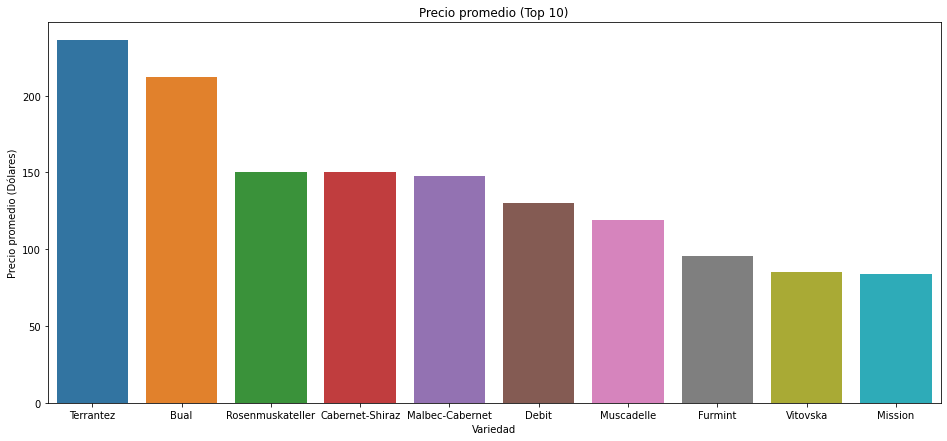

In [11]:
"""
SECUENCIA: precio promedio x VARIEDAD 
1. Seleccionar las variables
2. Agrupar por país ("variedad")
3. Calcular la media de precios ("price")
4. Resetear el índice 
5. Ordenar precios promedio en orden descendente
6. Definir el valor de X en la gráfica de barras que son las variedades
7. Definir Y en la gráfica de barras que son precios promedio (values de la Serie)
8. Usar Seaborn para graficar el diagrama de barras
9. Rotular la gráfica y los ejes

"""
promedios = df[['variety','price']].groupby("variety").mean().reset_index().sort_values(by=['price'], ascending=False)

x=promedios.variety
y=promedios.price

plt.figure(figsize=(16,7))
sns.barplot(x[:10], y[:10])

plt.xlabel("Variedad")
plt.ylabel("Precio promedio (Dólares)")
plt.title("Precio promedio (Top 10)")

plt.show()

#### Agregando anotaciones a nuestros gráficos

Es posible agregar información a nuestros gráficos, en forma de texto, o dibujos (e.g. flechas, líneas, círculos, etc.). Para ello, se utiliza la anotación (annotate) de ejes (axes). Detallar aquí cómo funciona nos llevaría mucho tiempo. Puedes consultar la documentación en estas ligas:

- [matplotlib.Artist](https://matplotlib.org/3.3.3/api/artist_api.html#matplotlib.artist.Artist)
    - [Artist tutorial](https://matplotlib.org/3.3.3/tutorials/intermediate/artists.html)
- [matplotlib.axes](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Patch](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Rectangle](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html)
- [matplotlib.pyplot.annotate](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.annotate.html)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


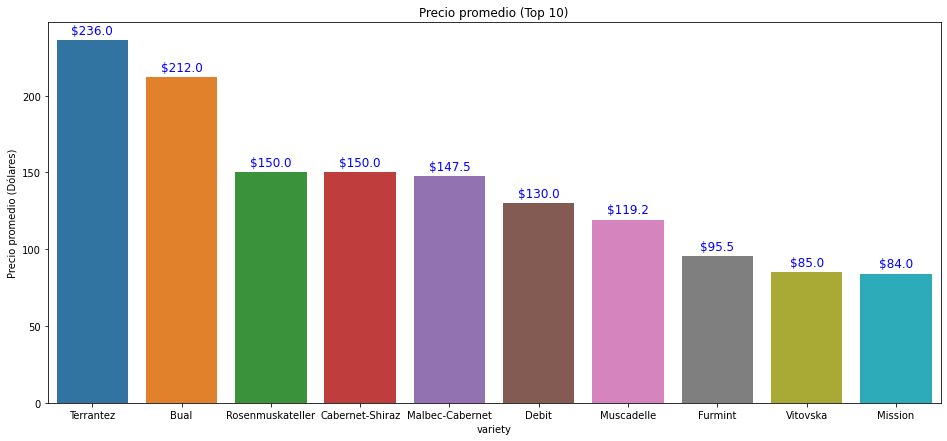

In [12]:
#Definimos el tamaño del canvas
plt.figure(figsize=(16,7))

# la variable "ax" (axes) contiene la información  del gráfico de barras.
# En particular, contiene todo lo relativo a los parches (rectángulos) del barplot.
ax = sns.barplot(x[:10], y[:10])

# Recorremos cada rectángulo
for p in ax.patches:
    ax.annotate("$%.1f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=12, color='blue',\
                xytext=(0, 10),\
                textcoords='offset points')
    
plt.ylabel("Precio promedio (Dólares)")
plt.title("Precio promedio (Top 10)")
plt.show()

### __Ahora queremos darnos una idea de cuáles podrían ser los países cuyos vinos tienen una mejor razón calidad-precio en promedio.__

#### &#9758; Muestra en una gráfica de barras la razón puntos/precio promedio por país, en orden descendente (_top 10_). Muestra los valores de la razón sobre cada barra. 

✋ __Recuerda que si divides entre 0 o Nan obtendrás inf o nan__
 
🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

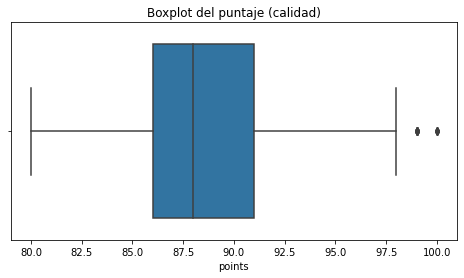

In [13]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df.points)
plt.title("Boxplot del puntaje (calidad)")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


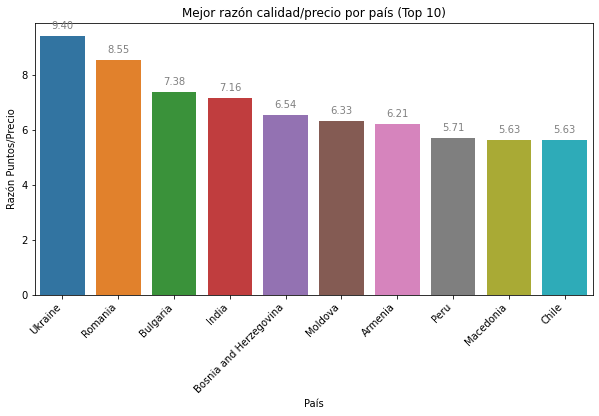

In [14]:
"""
SECUENCIA: razon calidad - precio x país 
1. Seleccionar las variables
2. Calcular la razón puntos/precio ... para el caso de NaN se considera el precio promedio
3. Agrupar por país
3. Calcular la media de la razon
4. Resetear el índice 
5. Ordenar razon x pais en orden descendente
6. Definir el valor de X en la gráfica de barras que son países
7. Definir Y en la gráfica de barras que es la razon (values de la Serie)
8. Usar Seaborn para graficar el diagrama de barras
9. Rotular la gráfica y los ejes
"""
### TU CODIGO AQUI ##

df["razon"]=df["points"].div(df["price"], fill_value=(df[["price"]].mean())).round(2)
promedios=df[['country', 'razon']].groupby("country").mean().sort_values(by=['razon'], ascending=False).reset_index()

x=promedios.country
y=promedios.razon

#####################

plt.figure(figsize=(10,5))

ax = sns.barplot(x[:10], y[:10])

plt.title("Mejor razón calidad/precio por país (Top 10)")
plt.xlabel("País")
plt.xticks(rotation= 45, ha="right")
plt.ylabel("Razón Puntos/Precio")

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='gray', xytext=(0, 10),
                 textcoords='offset points')
plt.show()

### __¿Qué vinos tienen la mejor puntuación y a qué países pertenecen?__

#### &#9758; Muestra en una gráfica de pastel la proporción de los países que tienen los 20 mejores vinos; es decir, los primeros 20 de mayor puntaje.  

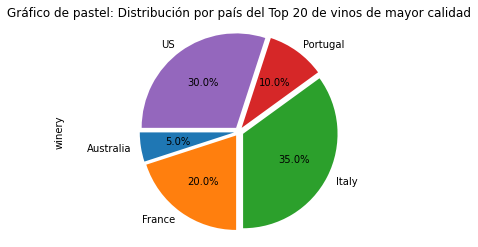

In [15]:
#Grafica de Distribución por país del Top 20 de vinos de mayor calidad
conteo=df[["country", 'winery', "points"]].sort_values(by=["points"], ascending=False).head(20).groupby("country").count().reset_index()
labels=conteo.country
conteo.winery.plot.pie(labels=labels, 
                       startangle=180, 
                       autopct = '%1.1f%%', 
                       explode = (0.05, 0.05, 0.05, 0.05, 0.05))
plt.axis('equal') 
plt.title('Gráfico de pastel: Distribución por país del Top 20 de vinos de mayor calidad')
plt.show()


### __¿Cuáles son las 10 variedades de uva más abundantes y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [16]:
# TOP DE LAS 10 VARIEDADES DE UVA MÁS ABUNDANTES Y LA PROPORCIÓN QUE REPRESENTAN. 

variedades=df['variety'].value_counts(normalize=True).mul(100).round(2).reset_index().head(10)
variedades.rename(columns={"variety": "Porcentaje", "index": "Variedad"})


,Variedad,Porcentaje
0,Pinot Noir,10.16
1,Chardonnay,8.91
2,Cabernet Sauvignon,7.26
3,Red Blend,6.97
4,Bordeaux-style Red Blend,5.27
5,Riesling,4.01
6,Sauvignon Blanc,3.91
7,Syrah,3.17
8,Rosé,2.65
9,Merlot,2.35


### __¿Cuáles son las 20 bodegas más mencionadas y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [17]:
# TOP DE LAS 20 BODEGAS MÁS MENCIONADAS Y LA PORPORCIÓN QUE REPRESENTAN DEL TOTAL
bodegas = df['winery'].value_counts(normalize=True).mul(100).round(3).reset_index().head(20)
bodegas.rename(columns={"winery": "% Menciones", "index": "Bodega"})


,Bodega,% Menciones
0,Georges Duboeuf,0.182
1,Wines & Winemakers,0.178
2,Testarossa,0.162
3,Louis Latour,0.145
4,Chateau Ste. Michelle,0.143
5,Williams Selyem,0.143
6,DFJ Vinhos,0.143
7,Concha y Toro,0.130
8,Gary Farrell,0.123
9,Lynmar,0.120


### __Vamos ahora a construir una nueva tabla de información__

#### &#9758; Construye una tabla que muestre país, variedad de uva, bodega, y valores de puntuación y precio.
- Considera las 10 variedades de uva y las 20 bodegas más importantes.
- Haz una tabla con estos datos y sólo los valores de país, bodega, variedad, puntuación y precio correspondientes.
- Agrega una columna con el valor de puntos/precio
- Cambia el nombre de la bodega para que éste incluya su país de origen.
- Ordena los datos por nombre de país, variedad y bodega (orden ascendente).

In [18]:
#TU CODIGO
"""
1. Seleccionar los datos
2. Hacer merge del df ['country', 'variety', 'winery', 'points', 'price'] con los frames de TOP10 variedades y TOP20 bodegas
3. Dropear las filas no necesarias 
4. Renombrar filas
5. Calcular columna puntos/precio
6. Cambiar el nombre de la bodega para que incluya país de origen
7. Ordenar los datos por país, variedad y bodega (orden ascendente)
"""

pv_df=df[['country', 'variety', 'winery', 'points', 'price']]
merged_pv = pv_df.merge(variedades, how="inner", left_on="variety", right_on="index").merge(bodegas, how="inner", left_on="winery", right_on="index")

p_v=merged_pv.drop(["index_x", "variety_y", "winery_y", "index_y"], axis=1)
p_v=p_v.rename(columns={"variety_x": "variety", "winery_x": "winery"})

p_v["razon"]=p_v["points"].div(p_v["price"], fill_value=(p_v[["price"]].mean())).round(2)
p_v["bodega"] = p_v["winery"] + " (" + p_v["country"] +")"
p_v=p_v.sort_values(by=["country", "variety", "bodega"], ascending=True).reset_index()


In [19]:
p_v

,index,country,variety,winery,points,price,razon,bodega
0,942,Argentina,Cabernet Sauvignon,Trapiche,84,10.0,8.40,Trapiche (Argentina)
1,943,Argentina,Cabernet Sauvignon,Trapiche,88,15.0,5.87,Trapiche (Argentina)
2,944,Argentina,Cabernet Sauvignon,Trapiche,90,15.0,6.00,Trapiche (Argentina)
3,945,Argentina,Cabernet Sauvignon,Trapiche,88,10.0,8.80,Trapiche (Argentina)
4,946,Argentina,Cabernet Sauvignon,Trapiche,91,30.0,3.03,Trapiche (Argentina)
...,...,...,...,...,...,...,...,...
994,377,US,Syrah,Testarossa,85,49.0,1.73,Testarossa (US)
995,378,US,Syrah,Testarossa,91,54.0,1.69,Testarossa (US)
996,379,US,Syrah,Testarossa,94,54.0,1.74,Testarossa (US)
997,380,US,Syrah,Testarossa,94,54.0,1.74,Testarossa (US)


#### &#9758; Observa la relación puntos-precio por país

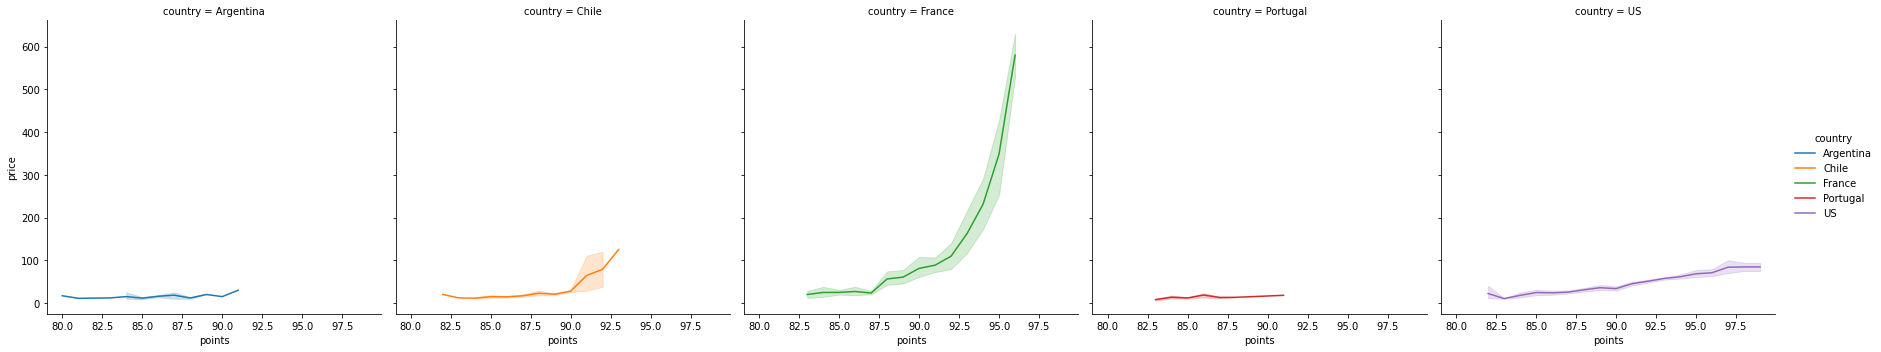

In [20]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=p_v)

#### &#9758; Observa las distribuciones por pares en función de la variedad de uva.

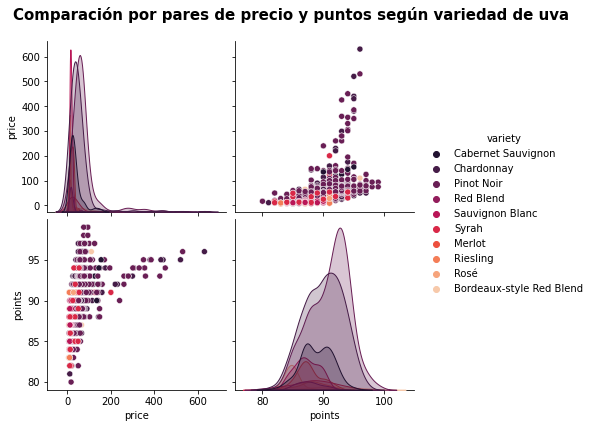

In [21]:
ax=sns.pairplot(p_v, vars=["price", "points"], hue="variety",height=3, palette='rocket')
ax.fig.subplots_adjust(top = 0.9)
ax.fig.suptitle("Comparación por pares de precio y puntos según variedad de uva", fontsize=15, fontweight='bold')
plt.show()

#### &#9758; Observa las distribuciones por pares en función del país.

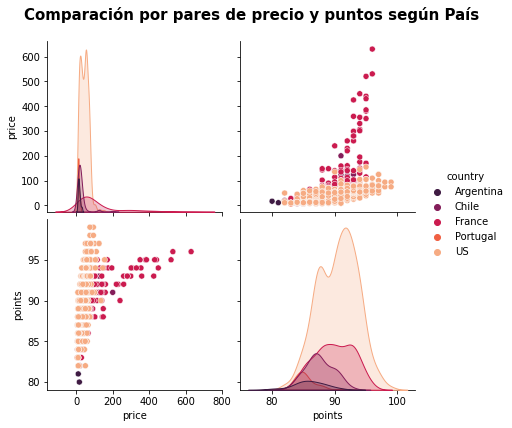

In [22]:
#TU CODIGO
ax=sns.pairplot(p_v, vars=["price", "points"], hue="country",height=3, palette='rocket')
ax.fig.subplots_adjust(top = 0.9)
ax.fig.suptitle("Comparación por pares de precio y puntos según País", fontsize=15, fontweight='bold')
plt.show()


#### &#9758; Observa las distribuciones por pares en función de la bodega.

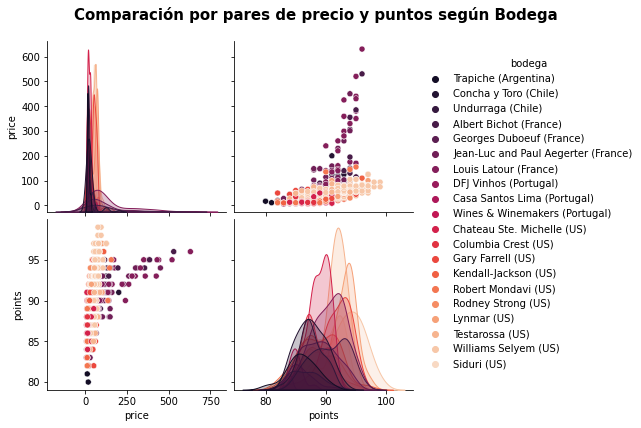

In [23]:

ax=sns.pairplot(p_v, vars=["price", "points"], hue="bodega",height=3,palette='rocket')
ax.fig.subplots_adjust(top = 0.9)
ax.fig.suptitle("Comparación por pares de precio y puntos según Bodega", fontsize=15, fontweight='bold')

plt.show()

#### &#9758; Observa las distribuciones (scatter) de precio por variedad de uva.

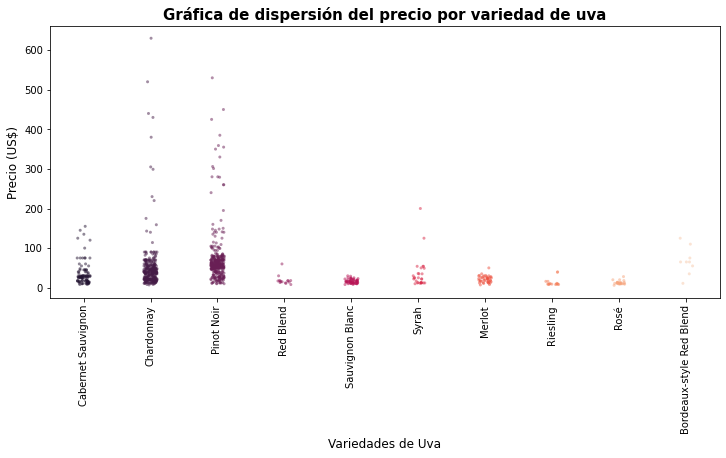

In [24]:
#TU CODIGO
plt.figure(figsize=(12,5))

sns.stripplot(x="variety", y= "price", data=p_v, palette='rocket', s=3, alpha=.5, dodge=True)

plt.title('Gráfica de dispersión del precio por variedad de uva', fontsize=15, fontweight='bold')
plt.xlabel("Variedades de Uva", fontsize=12)
plt.ylabel("Precio (US$)", fontsize=12)
plt.xticks(rotation=90)
plt.show()


#### &#9758; Observa las distribuciones (scatter) de precio por bodega.

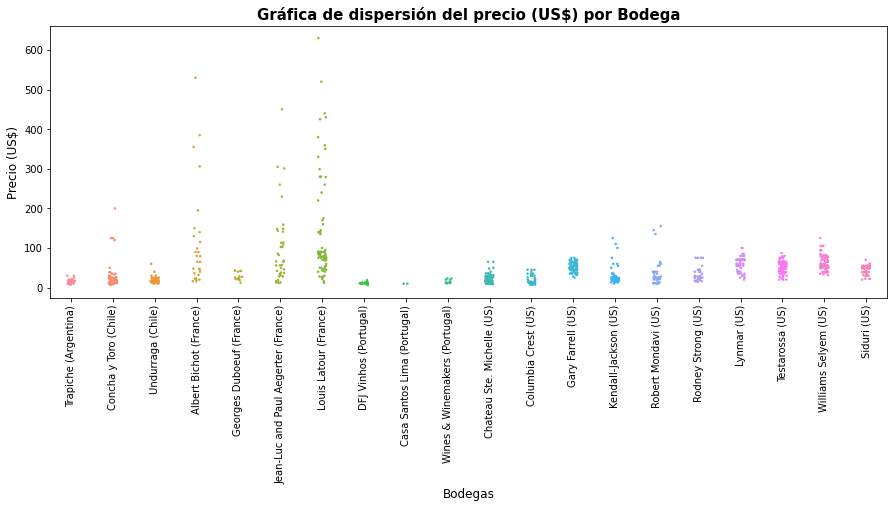

In [25]:
#TU CODIGO

plt.figure(figsize=(15,5))

sns.stripplot(x="bodega", y= "price", data=p_v, s=2.5, alpha=1, dodge=True) 
plt.title('Gráfica de dispersión del precio (US$) por Bodega', fontsize=15, fontweight='bold')
plt.xlabel("Bodegas", fontsize=12)
plt.ylabel("Precio (US$)", fontsize=12)
plt.xticks(rotation=90)
plt.show()

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.

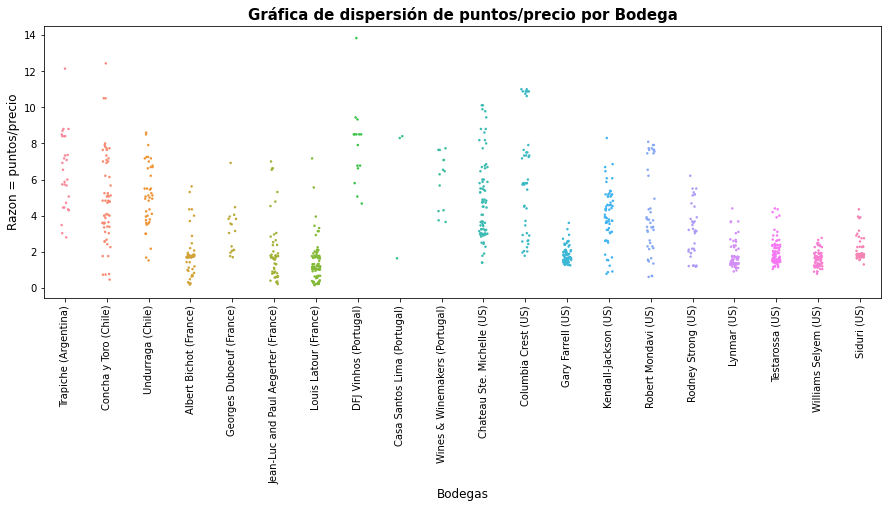

In [26]:
#TU CODIGO
plt.figure(figsize=(15,5))

sns.stripplot(x="bodega", y= "razon", data=p_v, s=2.5, alpha=1, dodge=True) 
plt.title('Gráfica de dispersión de puntos/precio por Bodega', fontsize=15, fontweight='bold')
plt.xlabel("Bodegas", fontsize=12)
plt.ylabel("Razon = puntos/precio", fontsize=12)
plt.xticks(rotation=90)
plt.show()

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por país.

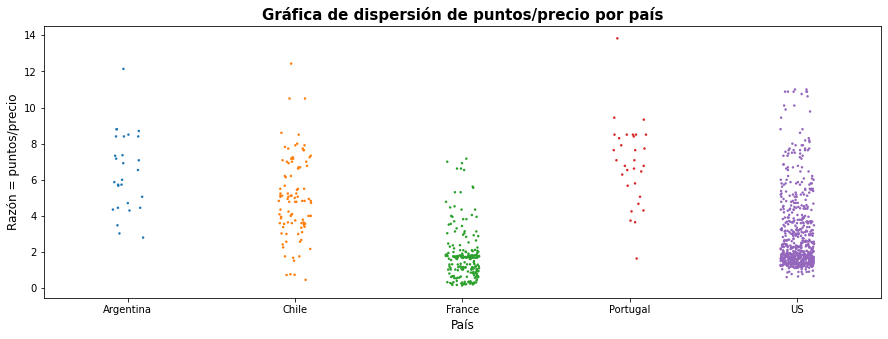

In [27]:
#TU CODIGO

plt.figure(figsize=(15,5))

sns.stripplot(x="country", y= "razon", data=p_v, s=2.5, alpha=1, dodge=True) 
plt.title('Gráfica de dispersión de puntos/precio por país', fontsize=15, fontweight='bold')
plt.xlabel("País", fontsize=12)
plt.ylabel("Razón = puntos/precio", fontsize=12)
#plt.xticks(rotation=90)
plt.show()

### __Agrega los datos de México a esta última tabla de información__

#### &#9758; Une la tabla de vinosMX a la tabla p_v
- Asegúrate de __no agregar__ la columna de descripción 

In [28]:
p_v.shape, vinosMX.shape

((999, 8), (30, 6))

In [29]:
print(vinosMX.columns)
print(p_v.columns)

Index(['country', 'winery', 'variety', 'description', 'points', 'price'], dtype='object')
Index(['index', 'country', 'variety', 'winery', 'points', 'price', 'razon',
       'bodega'],
      dtype='object')


In [30]:
p_v.head()

,index,country,variety,winery,points,price,razon,bodega
0,942,Argentina,Cabernet Sauvignon,Trapiche,84,10.0,8.40,Trapiche (Argentina)
1,943,Argentina,Cabernet Sauvignon,Trapiche,88,15.0,5.87,Trapiche (Argentina)
2,944,Argentina,Cabernet Sauvignon,Trapiche,90,15.0,6.00,Trapiche (Argentina)
3,945,Argentina,Cabernet Sauvignon,Trapiche,88,10.0,8.80,Trapiche (Argentina)
4,946,Argentina,Cabernet Sauvignon,Trapiche,91,30.0,3.03,Trapiche (Argentina)


In [245]:
#TU CODIGO
#<COMPLETA> # nuevo dataFrame que contiene la unión de las tablas

df3=p_v.append(vinosMX).drop(['index', 'description'], axis=1).reset_index()
df3


,index,country,variety,winery,points,price,razon,bodega
0,0,Argentina,Cabernet Sauvignon,Trapiche,84,10.0,8.40,Trapiche (Argentina)
1,1,Argentina,Cabernet Sauvignon,Trapiche,88,15.0,5.87,Trapiche (Argentina)
2,2,Argentina,Cabernet Sauvignon,Trapiche,90,15.0,6.00,Trapiche (Argentina)
3,3,Argentina,Cabernet Sauvignon,Trapiche,88,10.0,8.80,Trapiche (Argentina)
4,4,Argentina,Cabernet Sauvignon,Trapiche,91,30.0,3.03,Trapiche (Argentina)
...,...,...,...,...,...,...,...,...
1024,25,Mexico,Red Blend,Viñas de Garza,92,54.0,NaN,NaN
1025,26,Mexico,Chardonnay,L.A. Cetto,84,10.0,NaN,NaN
1026,27,Mexico,Sauvignon Blanc-Chenin Blanc,Hacienda La Lomita,86,22.0,NaN,NaN
1027,28,Mexico,Bordeaux-style Red Blend,La Lomita,88,40.0,NaN,NaN


#### &#9758; Calcula los valores de points/price para los vinos de México
- TIP: Usa el método apply sobre `df3[['points','price','points/price']]`

In [260]:
f = lambda x: x.div(df3["price"], fill_value=(df[["price"]].mean())).round(2)
df3[['razon']]=df3[['points']].apply(f, axis=0).round(1)
df3["bodega"] = df3["winery"] + " (" + df3["country"] +")"
df3

#df["razon"]=df["points"].div(df["price"], fill_value=(df[["price"]].mean())).round(2)


#df3.sort_values(by=["razon"], ascending=False)
#df3.isna().sort_values(by=["razon"], ascending=False)

,index,country,variety,winery,points,price,razon,bodega
0,0,Argentina,Cabernet Sauvignon,Trapiche,84,10.0,8.4,Trapiche (Argentina)
1,1,Argentina,Cabernet Sauvignon,Trapiche,88,15.0,5.9,Trapiche (Argentina)
2,2,Argentina,Cabernet Sauvignon,Trapiche,90,15.0,6.0,Trapiche (Argentina)
3,3,Argentina,Cabernet Sauvignon,Trapiche,88,10.0,8.8,Trapiche (Argentina)
4,4,Argentina,Cabernet Sauvignon,Trapiche,91,30.0,3.0,Trapiche (Argentina)
...,...,...,...,...,...,...,...,...
1024,25,Mexico,Red Blend,Viñas de Garza,92,54.0,1.7,Viñas de Garza (Mexico)
1025,26,Mexico,Chardonnay,L.A. Cetto,84,10.0,8.4,L.A. Cetto (Mexico)
1026,27,Mexico,Sauvignon Blanc-Chenin Blanc,Hacienda La Lomita,86,22.0,3.9,Hacienda La Lomita (Mexico)
1027,28,Mexico,Bordeaux-style Red Blend,La Lomita,88,40.0,2.2,La Lomita (Mexico)


#### &#9758; Observa la relación puntos-precio por país

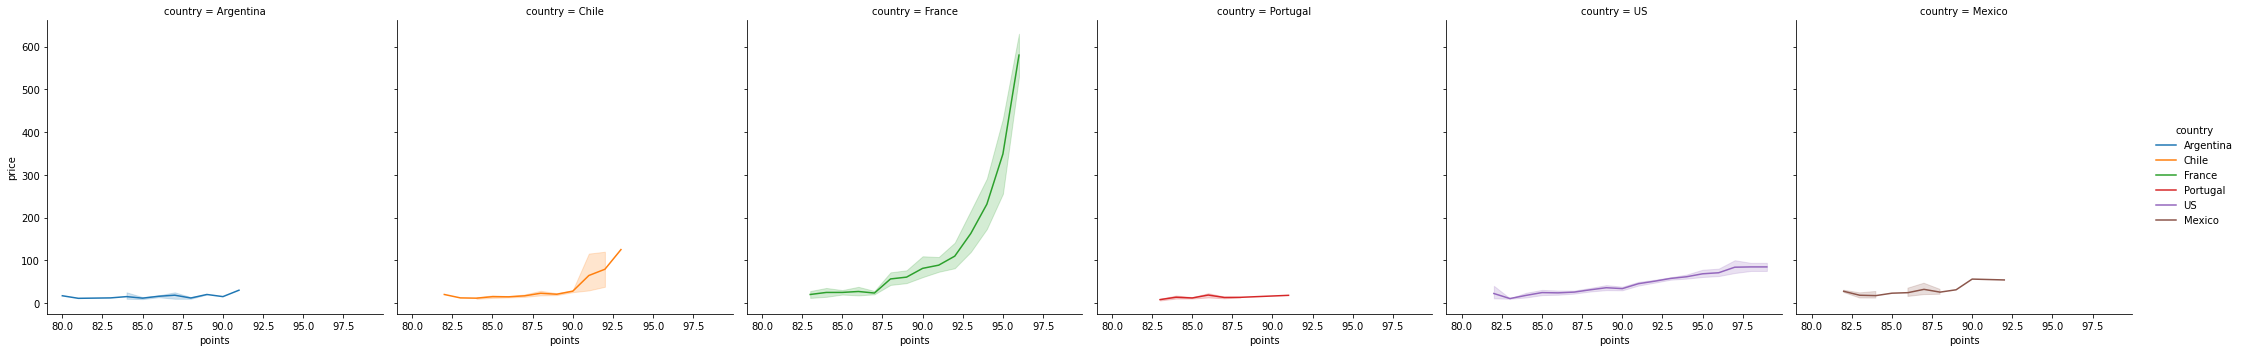

In [261]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=df3)

#### &#9758; Observa las distribuciones por pares en función del país.
- Construye una tabla auxiliar "mx_top", donde los datos de México (en df3) aparezcan al final de la tabla mx_top.

In [262]:
mx_top = df3
mx_top.shape

(1029, 8)

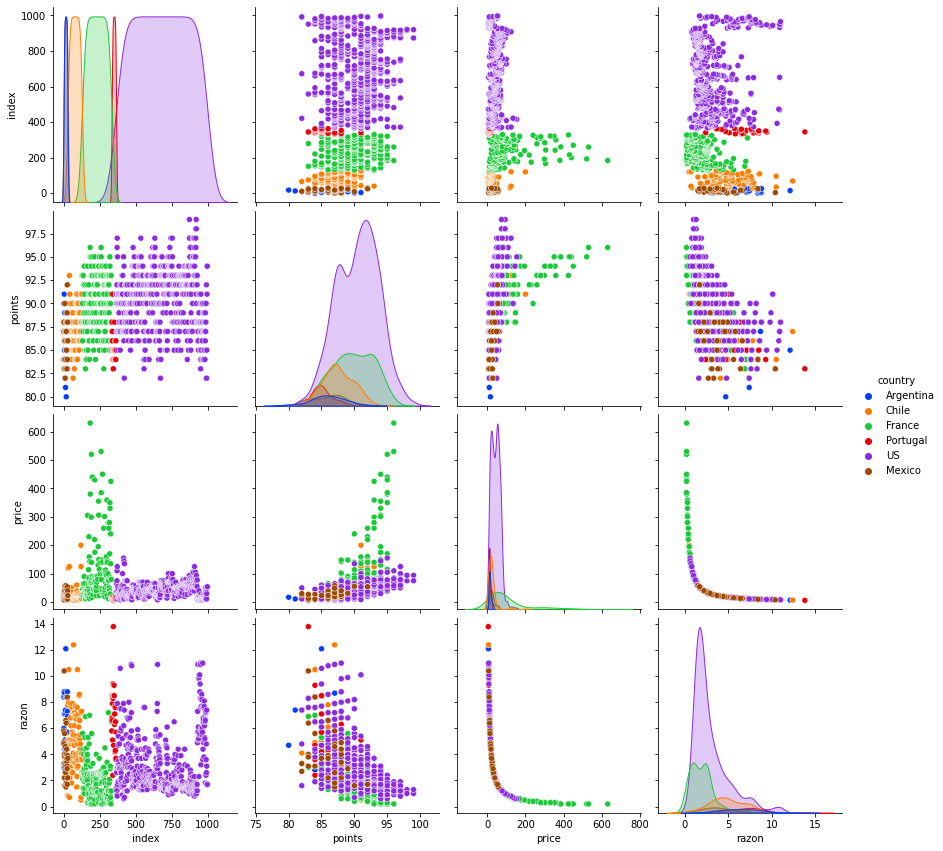

In [263]:
sns.pairplot(mx_top, hue="country", height=3, palette='bright')

#### &#9758; Observa las distribuciones (scatter) de puntos por país.

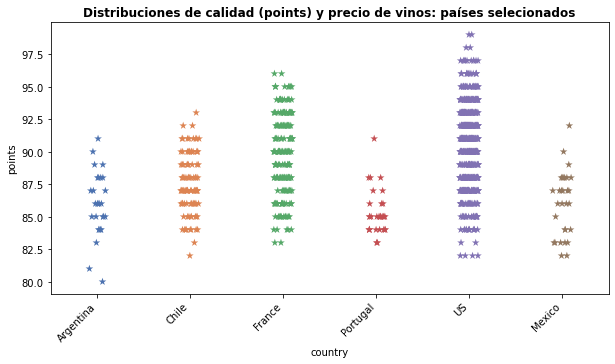

In [264]:
plt.figure(figsize=(10,5))
sns.stripplot(x="country", y="points", data=df3, dodge=True, palette='deep', marker='*', size=8)
plt.xticks(rotation= 45, ha="right")
plt.title("Distribuciones de calidad (points) y precio de vinos: países selecionados", size=12, fontweight='bold')
plt.show()

#### &#9758; Observa las distribuciones (scatter) de precios por bodega.

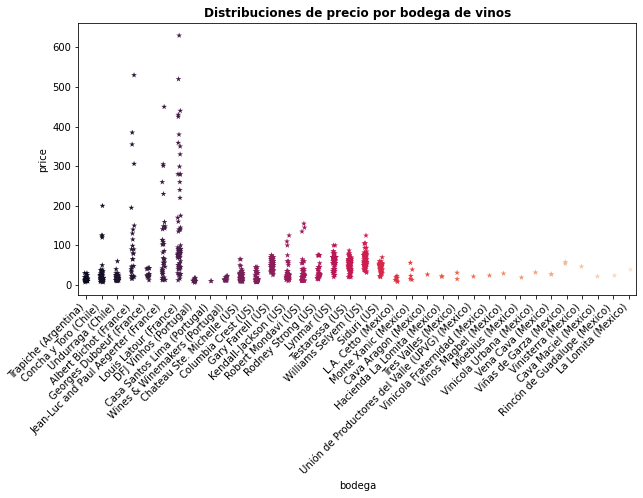

In [265]:
plt.figure(figsize=(10,5))
sns.stripplot(x="bodega", y="price", data=df3,dodge=True,palette='rocket',marker='*',size=6)
plt.xticks(rotation= 45, ha="right")
plt.title("Distribuciones de precio por bodega de vinos", size=12, fontweight='bold')
plt.show()

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.
- Dibuja una línea que marque el promedio de todos los datos
- Dibuja marcas ubicadando los valores promedio por cada bodega (TIP: usa `groupby` sobre país y bodega para calcular primero los valores promedio)

In [298]:
# TU CODIGO

medias = df3[["country", 'bodega', 'points', 'price', 'razon']].groupby(by=["country", "bodega"]).mean().round(1)
medias

points  price  razon
country   bodega                                                              
Argentina Trapiche (Argentina)                              86.0   15.1    6.4
Chile     Concha y Toro (Chile)                             87.6   28.2    4.9
          Undurraga (Chile)                                 87.5   19.3    5.1
France    Albert Bichot (France)                            90.6  115.7    2.2
          Georges Duboeuf (France)                          86.6   28.9    3.3
          Jean-Luc and Paul Aegerter (France)               88.9   96.0    2.2
          Louis Latour (France)                             90.6  133.8    1.5
Mexico    Cava Aragon (Mexico)                              88.0   27.0    3.3
          Cava Maciel (Mexico)                              88.0   22.0    4.0
          Hacienda La Lomita (Mexico)                       84.5   21.5    4.0
          L.A. Cetto (Mexico)                               85.4   15.7    6.1
          La Lomita (Mexico)                                88.0   40.0    2.2
          Monte Xanic (Mexico)                              87.0   29.2    4.0
          Möebius (Mexico)                                  87.0   19.0    4.6
          Rincón de Guadalupe (Mexico)                      88.0   26.0    3.4
          Tres Valles (Mexico)                              86.5   23.0    4.2
          Unión de Productores del Valle (UPVG) (Mexico)    83.0   22.0    3.8
          Vena Cava (Mexico)                                83.5   27.0    3.1
          Vinicola Fraternidad (Mexico)                     82.0   25.0    3.3
          Vinicola Urbana (Mexico)                          87.0   33.0    2.6
          Vinisterra (Mexico)                               87.0   49.0    1.8
          Vinos Magbel (Mexico)                             82.0   30.0    2.7
          Viñas de Garza (Mexico)                           89.5   56.0    1.6
Portugal  Casa Santos Lima (Portugal)                       83.7   10.0    6.4
          DFJ Vinhos (Portugal)                             85.9   11.7    7.9
          Wines & Winemakers (Portugal)                     85.1   15.2    6.0
US        Chateau Ste. Michelle (US)                        88.8   22.8    4.8
          Columbia Crest (US)                               88.1   19.3    6.1
          Gary Farrell (US)                                 91.7   52.5    1.8
          Kendall-Jackson (US)                              89.0   29.2    4.0
          Lynmar (US)                                       92.8   60.7    1.7
          Robert Mondavi (US)                               87.6   33.9    4.3
          Rodney Strong (US)                                89.1   35.8    3.2
          Siduri (US)                                       90.3   45.7    2.1
          Testarossa (US)                                   91.0   51.4    1.9
          Williams Selyem (US)                              93.1   62.6    1.6

In [299]:
medias.groupby(["country"]).mean()


,points,price,razon
country,,,
Argentina,86.000,15.1000,6.400000
Chile,87.550,23.7500,5.000000
France,89.175,93.6000,2.300000
Mexico,86.025,29.0875,3.418750
Portugal,84.900,12.3000,6.766667
US,90.150,41.3900,3.150000


In [300]:
medias.groupby(["bodega"]).mean()

,points,price,razon
bodega,,,
Albert Bichot (France),90.6,115.7,2.2
Casa Santos Lima (Portugal),83.7,10.0,6.4
Cava Aragon (Mexico),88.0,27.0,3.3
Cava Maciel (Mexico),88.0,22.0,4.0
Chateau Ste. Michelle (US),88.8,22.8,4.8
Columbia Crest (US),88.1,19.3,6.1
Concha y Toro (Chile),87.6,28.2,4.9
DFJ Vinhos (Portugal),85.9,11.7,7.9
Gary Farrell (US),91.7,52.5,1.8


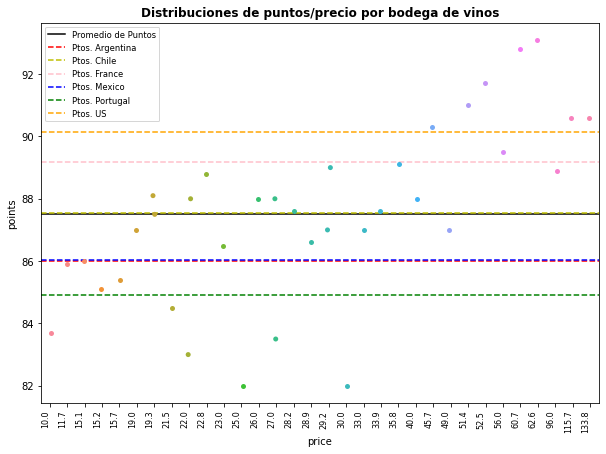

In [301]:

plt.figure(figsize=(10,7))
sns.stripplot(x="price", y="points", data=medias)
plt.xticks(rotation= 90, ha="right", size=8)

plt.title("Distribuciones de puntos/precio por bodega de vinos", size=12, fontweight='bold')

plt.axhline(y=medias['points'].mean(), color='black', linestyle='-',  label="Promedio de Puntos")
#plt.axvline(x=medias['price'].mean(), color='black', linestyle='-',  label="Precio Promedio")
plt.axhline(y=medias["points"].groupby("country").mean().loc[["Argentina"]].item(), color='red', linestyle='--',  label="Ptos. Argentina")
plt.axhline(y=medias["points"].groupby("country").mean().loc[["Chile"]].item(), color='y', linestyle='--',  label="Ptos. Chile")
plt.axhline(y=medias["points"].groupby("country").mean().loc[["France"]].item(), color='pink', linestyle='--',  label="Ptos. France")
plt.axhline(y=medias["points"].groupby("country").mean().loc[["Mexico"]].item(), color='b', linestyle='--',  label="Ptos. Mexico")
plt.axhline(y=medias["points"].groupby("country").mean().loc[["Portugal"]].item(), color='g', linestyle='--',  label="Ptos. Portugal")
plt.axhline(y=medias["points"].groupby("country").mean().loc[["US"]].item(), color='orange', linestyle='--',  label="Ptos. US")
plt.legend(loc='best', fontsize='small')
plt.show()

#### &#9758; Si consideramos la proporción de los países con mejor relación puntos/precio, ¿cómo queda México?
- Usa un gráfico de pastel

In [277]:
df3.sort_values(by=["razon"], ascending=False)
#df3.isna().sort_values(by=["razon"], ascending=False)

,index,country,variety,winery,points,price,razon,bodega
345,345,Portugal,Rosé,DFJ Vinhos,83,6.0,13.8,DFJ Vinhos (Portugal)
69,69,Chile,Merlot,Concha y Toro,87,7.0,12.4,Concha y Toro (Chile)
15,15,Argentina,Chardonnay,Trapiche,85,7.0,12.1,Trapiche (Argentina)
948,948,US,Riesling,Columbia Crest,88,8.0,11.0,Columbia Crest (US)
965,965,US,Sauvignon Blanc,Columbia Crest,88,8.0,11.0,Columbia Crest (US)
...,...,...,...,...,...,...,...,...
260,260,France,Pinot Noir,Albert Bichot,96,530.0,0.2,Albert Bichot (France)
184,184,France,Chardonnay,Louis Latour,96,630.0,0.2,Louis Latour (France)
185,185,France,Chardonnay,Louis Latour,95,380.0,0.2,Louis Latour (France)
216,216,France,Chardonnay,Louis Latour,95,430.0,0.2,Louis Latour (France)


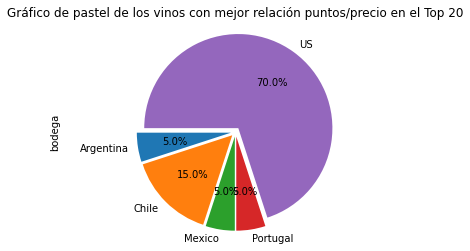

In [286]:
# TU CODIGO
#Grafica de Distribución por país del Top 20 de vinos de mayor calidad
conteo=df3[["country", 'bodega', "razon"]].sort_values(by=["razon"], ascending=False).head(20).groupby("country").count().reset_index()
labels=conteo.country
conteo.bodega.plot.pie(labels=labels, 
                       startangle=180, 
                       autopct = '%1.1f%%', 
                       explode = (0.05, 0.05, 0.05, 0.05, 0.05))
plt.axis('equal') 
plt.title('Gráfico de pastel de los vinos con mejor relación puntos/precio en el Top 20')
plt.show()


**En el top 20 de vinos de calidad, México tiene un porcentaje de 5% dentro de esta lista (solo una bodega), empatado con Argentina y Portugal, pero muy lejos de Chile y Estados Unidos.**